## Maestría en Inteligencia Artificial Aplicada (MNA)
### Proyecto Integrador
### Dra. Grettel Barceló Alonso / Dr. Carlos Alberto Villaseñor Padilla
### Avance 1. Análisis exploratorio de datos

### Integrantes
- A01794457 - Iossif Moises Palli Laura
- A01793984 - Brenda Zurazy Rodríguez Pérez
- A01794630 - Jesús Ramseths Echeverría Rivera

In [1]:
# Paqueterías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import nltk
import re

### I. Carga de los datos

In [2]:
df = pd.read_csv('../data/q_a_db.csv') # Se realiza la carga del conjunto de preguntas y respuestas
df.head()

,date,question,answer,category
0,2001-06-04,¿Qué fecha fue publicada la Ley de Fondos de I...,El 4 de junio de 2001.,Fondos de Inversión
1,2001-06-04,¿Qué regula la Ley de Fondos de Inversión?,Regula la organización y funcionamiento de los...,Fondos de Inversión
2,2001-06-04,¿Qué debe fomentar la aplicación de esta ley?,El desarrollo equilibrado y la diversificación...,Fondos de Inversión
3,2001-06-04,¿Qué es un activo objeto de inversión?,Son valores títulos y documentos aplicables al...,Fondos de Inversión
4,2001-06-04,¿Quién regula los fondos de inversión en México?,La Comisión Nacional Bancaria y de Valores.,Fondos de Inversión


### II. Estructura de los datos

In [3]:
# Estructura de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1143 non-null   object
 1   question  1143 non-null   object
 2   answer    1143 non-null   object
 3   category  1143 non-null   object
dtypes: object(4)
memory usage: 35.8+ KB


In [4]:
# Cambiar a tipo de fecha
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')

In [5]:
# Información descriptiva de los datos
df.describe()

,date,question,answer,category
count,1143,1143,1143,1143
unique,10,1133,1130,11
top,2022-12-12,¿Cuál es el objeto de esta ley?,La Secretaría de Hacienda y Crédito Público.,Sistemas de Pagos
freq,205,4,4,205


El análisis de este conjunto de datos revela que hay más de 1100 preguntas y respuestas únicas, algunas se repiten ligeramente. La pregunta más común aparece cuatro veces, al igual que la respuesta más frecuente. El dataset está dividido en 11 categorías diferentes, con "Sistemas de Pagos" siendo la más destacada.

- ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?

- Respuesta

In [6]:
# Cantidad de valores faltantes
df.isnull().sum()

date        0
question    0
answer      0
category    0
dtype: int64

- ¿Cuáles son las estadísticas resumidas del conjunto de datos?

In [7]:
print('De acuerdo al conjunto de datos:\n')
print(f'Existen {len(df["date"].unique())} fechas únicas')
print(f'Hay {len(df["category"].unique())} categorías de tipo de información')
print(f'Existen {len(df["question"].unique())} preguntas únicas')
print(f'Existen {len(df["answer"].unique())} respuestas únicas')

De acuerdo al conjunto de datos:

Existen 10 fechas únicas
Hay 11 categorías de tipo de información
Existen 1133 preguntas únicas
Existen 1130 respuestas únicas


In [8]:
# Fecha antigua y reciente
print(f'La fecha inicial encontrada es: {df["date"].min()}')
print(f'La fecha más reciente es: {df["date"].max()}')

La fecha inicial encontrada es: 1990-07-18
La fecha más reciente es: 2024-01-24


### III. Análisis univariante

In [9]:
# Cantidad de registros por categoría de información
df['category'].value_counts()

category
Sistemas de Pagos                                                                 205
Mercado de Valores                                                                160
Instituciones de Crédito                                                          145
Fondos de Inversión                                                               142
Ley de Instituciones de Crédito                                                   110
Ley de Uniones de Crédito                                                         100
Instituciones de Tecnología Financiera                                             91
Ley para Regular las Agrupaciones Financieras                                      60
Prevención e Identificación de Operaciones con Recursos de Procedencia Ilícita     50
Transparencia y Ordenamiento de los Servicios Financieros                          50
Sociedades de Información Crediticia                                               30
Name: count, dtype: int64

- Identificación de Outliers

Debido a que el conjunto de datos es sobre preguntas y respuestas...

In [10]:
# Cálcular longitud de las preguntas y respuestas
df['len_question'] = df['question'].map(len)
df['len_answer'] = df['answer'].map(len)

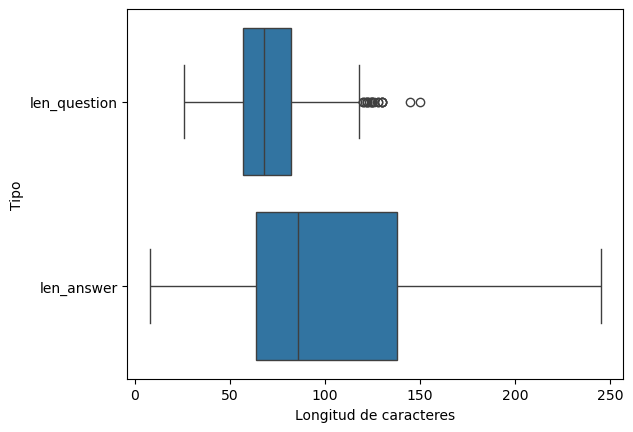

In [11]:
df_melted = df.melt(value_vars=['len_question', 'len_answer'], var_name='Tipo', value_name='Longitud de caracteres')
sns.boxplot(x='Longitud de caracteres', y='Tipo', data=df_melted)
plt.show()

Hay valores atípicos...

- Cardinalidad de Categoría

In [12]:
# Evaluar la cardinalidad de la variable category
cardinality = df['category'].nunique()
print(f'Existe un total de {cardinality} categorías')

Existe un total de 11 categorías


La columna "category" tiene una baja cardinalidad con tan solo 11 categorías únicas en 1143 registros, mientras que las columnas "question" y "answer" tienen una cardinalidad moderada (más de 1100 valores únicos) lo cual ayuda en el fine-tuning de un LLM.

- ¿Cómo se distribuyen los datos en función de diferentes categorías?

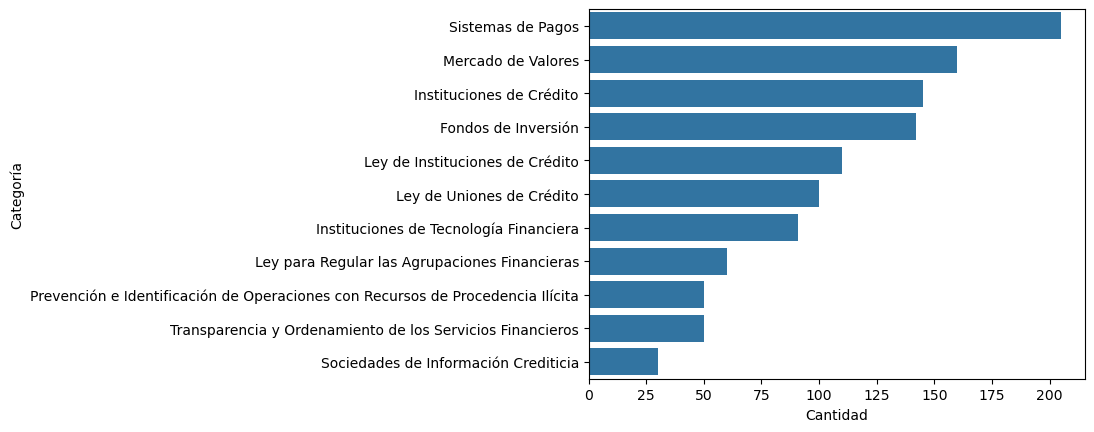

In [13]:
# Cálcular cantidad de registros por categpróa
categoria_count = df['category'].value_counts()
sns.barplot(x=categoria_count.values, y=categoria_count.index)
plt.xlabel('Cantidad')
plt.ylabel('Categoría')
plt.show()

- Distribución de preguntas por año

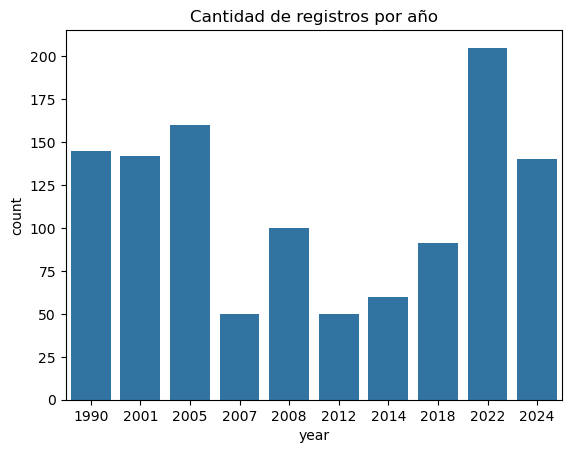

In [14]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
sns.countplot(x='year', data=df)
plt.title('Cantidad de registros por año')
plt.show()



*   Análisis de frecuencia de palabras



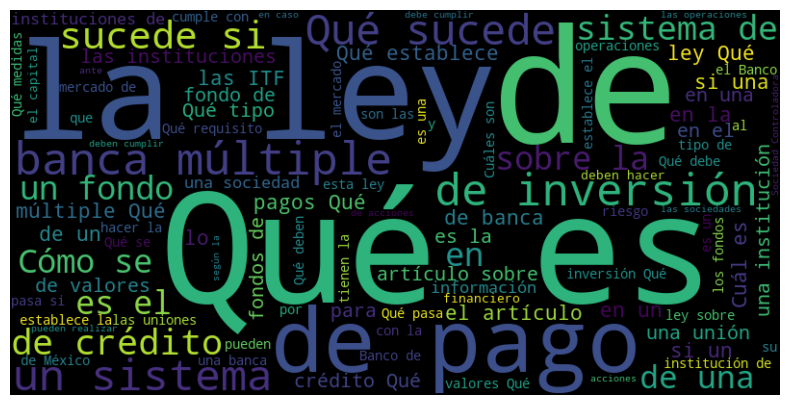

In [15]:
all_questions = ' '.join(df['question'])

wordcloud = WordCloud(width=800, height=400, max_words=100).generate(all_questions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Al usar la nube de palabras podemos observar que las palabras más frecuentes están relacionadas con la estructura de hacer preguntas.

### IV. Análisis Multivariante

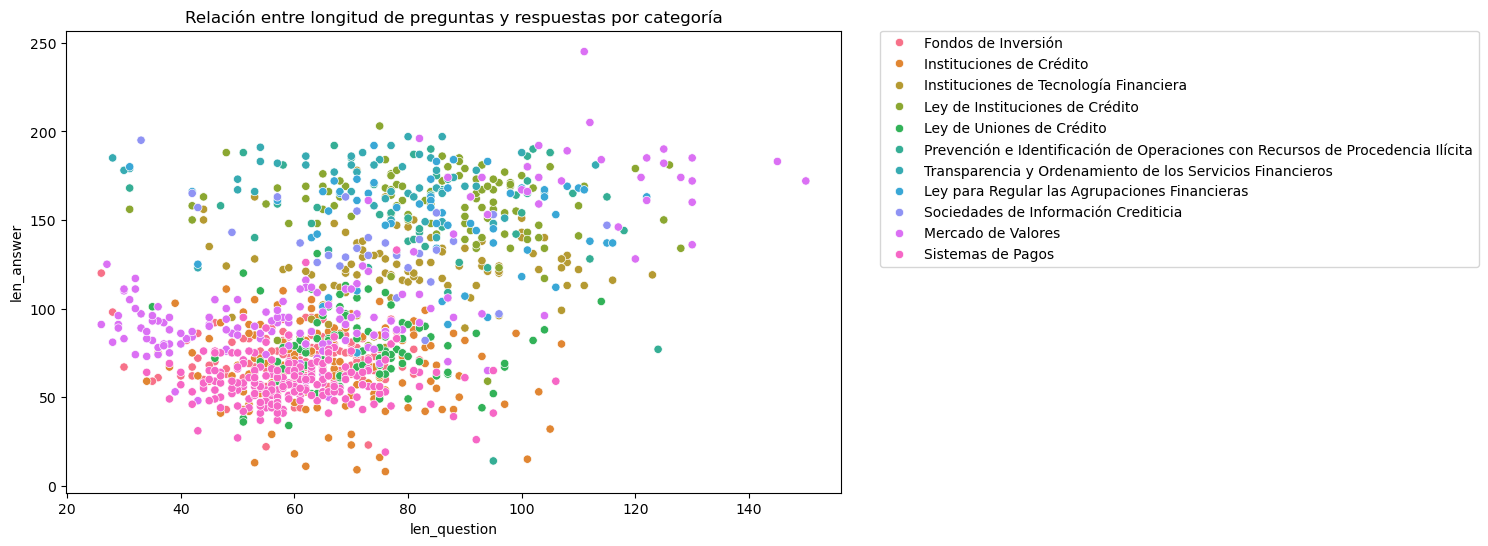

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='len_question', y='len_answer', hue='category', data=df)
plt.title('Relación entre longitud de preguntas y respuestas por categoría')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### V. Preprocesamiento

- Manejo de valores faltantes y duplicados

Se eliminan las preguntas y respuestas duplicadas ya que es importante cuando se va a realizar fine-tuning a un LLM porque ayuda a que el modelo no aprenda de forma repetitiva la misma información. Si dejamos las duplicaciones, el modelo podría darle más importancia de la que debería a ciertas preguntas o respuestas, afectando su capacidad para generar respuestas precisas en el futuro.

In [17]:
print(f'Registros totales: {df.shape[0]}')

# Quitamos valores duplicados en las preguntas y respuestas
df.drop_duplicates(subset=['question'], inplace=True)
df.drop_duplicates(subset=['answer'], inplace=True)

print(f'Registros totales después de quitar duplicados: {df.shape[0]}')

Registros totales: 1143
Registros totales después de quitar duplicados: 1120


- Manejo de valores atípicos

Dada la naturaleza de la base de datos este punto no aplica.

- Alta cardinalidad

La cardinalidad de la variable 'category' es de 11 por lo que no consideramos que tenga una alta cardinalidad por tal razón no es necesario hacer algún tratamiento adional sobre esta variable.

### VI. Conclusiones

La base de datos analizada contiene 1,143 registros, con 4 variables denominadas: Date, Question , Answer y Category.

La base de datos no tiene valores faltantes lo que es un buen indicador de la integridad de los datos.

En cuanto a la distribución de la longitud de caracteres de las preguntas se tiene que:

*   La mayoría de las preguntas tienen una longitud de caracteres que va aproximadamente entre 50 y 100, además hay varios valores atípicos (outliers) en las preguntas, con algunas preguntas que superan los 120 caracteres, y varias cercanas o superiores a los 150 caracteres

En cuanto a la distribución de la longitud de caracteres de las respuestas se tiene que:

* Las respuestas tienden a ser más largas, con una longitud que va desde alrededor de 70 hasta casi 150 caracteres, y no se observan outliers en este grupo

En conclusión, las preguntas tienden a ser más cortas y tienen algunos valores atípicos hacia longitudes mayores, mientras que las respuestas tienen una mayor variabilidad en su longitud, con respuestas generalmente más largas y sin outliers significativos.

Respecto a la distribución de preguntas por categoría, las tres principales son:
* Ley del Sistema de Pagos, con 205 preguntas (17.9% del total).
* Ley del Mercado de Valores, con 160 preguntas (14.0% del total).
* Ley de Instituciones de Crédito, con 145 preguntas (12.7% del total).

Estas tres categorías concentran un 46.4%.

Por último, las palabras con mayor frecuencia son "Ley" y "pago".

